In [3]:
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import box
import matplotlib.pyplot as plt

In [4]:
# Step 1: Load the shapefile of the country
sn = gpd.read_file(f"../data/geometry/sn_shp/sn.shp").dissolve(
    by=None
)  # 'by=None' means all geometries are merged into a single object

gm = gpd.read_file(f"../data/geometry/gm_shp/gm.shp").dissolve(
    by=None
)  # 'by=None' means all geometries are merged into a single object

In [5]:
# Step 2: Define the bounding box for ctr to create a grid
minx, miny, maxx, maxy = sn.total_bounds

# Step 3: Create a grid of 1°x1° cells
grid_cells = []
for x in np.arange(np.floor(minx), np.ceil(maxx), 1):
    for y in np.arange(np.floor(miny), np.ceil(maxy), 1):
        grid_cells.append(box(x, y, x + 1, y + 1))

# Step 4: Create a GeoDataFrame for the grid
grid = gpd.GeoDataFrame(grid_cells, columns=["geometry"], crs=sn.crs)

In [6]:
# Step 5: Intersect the grid with the ctr shapefile
intersection_sn = gpd.overlay(grid, sn, how="intersection")
intersection_gm = gpd.overlay(grid, gm, how="intersection")

In [7]:
# Add a 'country' column to each GeoDataFrame
intersection_sn["country"] = "Senegal"  # Label for Senegal
intersection_gm["country"] = "Gambia"  # Label for Gambia

# Concatenate the GeoDataFrames into a single GeoDataFrame using geopandas.concat
intersections = gpd.GeoDataFrame(
    pd.concat([intersection_sn, intersection_gm], ignore_index=True)
)

#
intersections.drop(columns=["source", "name"], inplace=True)
intersections["id"] = intersections.index

/var/folders/cm/dh8lmmxn3b5bcb2_gbz16ycm0000gn/T/ipykernel_45412/416624487.py:30: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


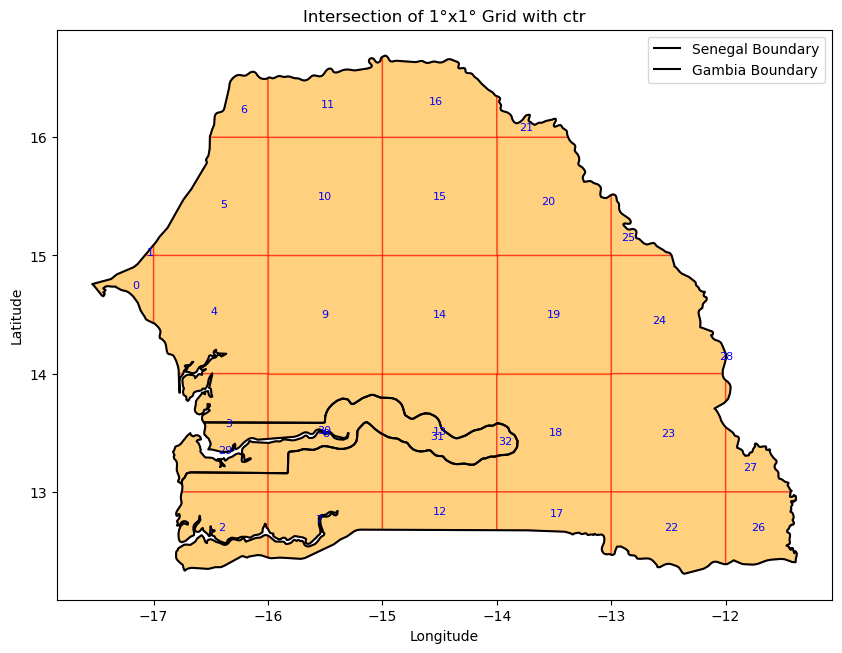

In [8]:
# Plot the merged ctr shape
fig, ax = plt.subplots(figsize=(10, 10))
sn.boundary.plot(ax=ax, edgecolor="black", label="Senegal Boundary")
gm.boundary.plot(ax=ax, edgecolor="black", label="Gambia Boundary")

# Plot the grid cells that intersect with ctr
intersections.plot(
    ax=ax, color="orange", edgecolor="red", alpha=0.5, label="Intersected Grid Cells"
)

# Plot index numbers at the center of each intersected cell
for idx, row in intersections.iterrows():
    # Calculate the centroid of the intersection
    centroid = row["geometry"].centroid
    # Annotate the index number on the plot
    ax.text(
        centroid.x,
        centroid.y,
        str(idx),
        fontsize=8,
        ha="center",
        va="center",
        color="blue",
    )

# Add title and legend
plt.title("Intersection of 1°x1° Grid with ctr")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()

# Save the figure to a file
output_file_path = "../data/geometry/intersection_map.png"  # Change the file path and extension as needed
plt.savefig(output_file_path, dpi=300, bbox_inches="tight")

plt.show()

In [9]:
intersections

,id,geometry,country
0,0,"POLYGON ((-17 15, -17 14.42659, -17.05948 14.4...",Senegal
1,1,"POLYGON ((-17 15, -17.07628 15, -17 15.08839, ...",Senegal
2,2,"MULTIPOLYGON (((-16 12.44316, -16.05501 12.461...",Senegal
3,3,"MULTIPOLYGON (((-16 13, -16.75322 13, -16.7499...",Senegal
4,4,"POLYGON ((-17 15, -16 15, -16 14, -16.48731 14...",Senegal
5,5,"POLYGON ((-16 16, -16 15, -17 15, -17 15.08839...",Senegal
6,6,"POLYGON ((-16 16, -16.50777 16, -16.50754 16.0...",Senegal
7,7,"POLYGON ((-16 13, -15 13, -15 12.67863, -15.14...",Senegal
8,8,"MULTIPOLYGON (((-15 13, -16 13, -16 13.15832, ...",Senegal
9,9,"POLYGON ((-16 14, -16 15, -15 15, -15 14, -16 ...",Senegal


In [10]:
intersections.to_file("../data/geometry/grid.geojson", driver="GeoJSON")

In [11]:
# Step 6: Export each intersected cell to a GeoJSON file
for idx, cell in intersections.iterrows():
    cell_gdf = gpd.GeoDataFrame([cell], columns=intersections.columns, crs=sn.crs)
    cell_gdf.to_file(
        f"../data/geometry/senegal_grid_cell_{idx}.geojson", driver="GeoJSON"
    )

print("GeoJSON files created for each 1°x1° intersecting cell with Senegal.")

GeoJSON files created for each 1°x1° intersecting cell with Senegal.


In [19]:
intersections["wkt"] = intersections["geometry"].apply(lambda geom: geom.wkt)

# If you want to extract the WKT strings as a list
wkt_list = intersections["wkt"].tolist()

# Display the WKT strings
print(wkt_list)

intersections.to_csv("../data/geometry/grid.csv", index=False)

['POLYGON ((-17 15, -17 14.426587798904146, -17.05947831812302 14.453924832502834, -17.07046464561941 14.465399373959547, -17.07616126144104 14.478583049908982, -17.11148027246291 14.53021879305291, -17.137847460471992 14.599025803887022, -17.148410401376715 14.613187678107133, -17.178212044780928 14.653143700233466, -17.206939260162613 14.67890059637014, -17.224110479755648 14.690415702673382, -17.243763799650733 14.699286141205677, -17.265451630364375 14.702826385380348, -17.281646291331914 14.70726160477462, -17.32404537821916 14.72890864874197, -17.33055579313668 14.736314200909945, -17.363596160950955 14.735907421285763, -17.39232337401045 14.739325391599015, -17.417388476331023 14.73769767223498, -17.43980872417097 14.722072708352439, -17.43138587173451 14.712469825628924, -17.41934160087402 14.708970439573418, -17.426828577615076 14.69440328412112, -17.439808722720922 14.688462619966087, -17.43639075618171 14.685288898143233, -17.430246546976836 14.678045878614359, -17.426828580